In [2]:
# IMPORTS
from vanilla_option import vanilla_option
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')


# INPUTS
S = 100
K = 100
T = 1/12
r = 0.01
q = 0
sd = 0.15

# Basic Delta Shapes

Let's start by simply looking as the basic shape of delta depending on the price of the underlying (S):
- A **call** option has a <ins>positive correlation</ins> with the underlying as its price *increases* as the price of the underlying *increases*. Therefore, its <ins>delta is positive</ins>.
<center> $ \Delta_{C} \in \{0, 1\} $ </center>

- A **put** option has a <ins>negative correlation</ins> with the underlying as its price *decreases* as the price of the underlying *increases*. Therefore, its <ins>delta is negative</ins>.
<center> $ \Delta_{P} \in \{-1, 0\} $ </center>

A call (put) option At-The-Money (ATM) has a delta approximately of 0.5 (-0.5). When In-The-Money (ITM), a call (put) option has a delta bigger than 0.5 (-0.5) while when Out-of-The-Money it has a delta smaller than 0.5 (-0.5). The more an option is OTM, the closer its delta gets to 0 while the more an option is ITM the closer it gets to behave as the underlying (delta of 1 for a call and of -1 for a put).

(-1.01, 1.01)

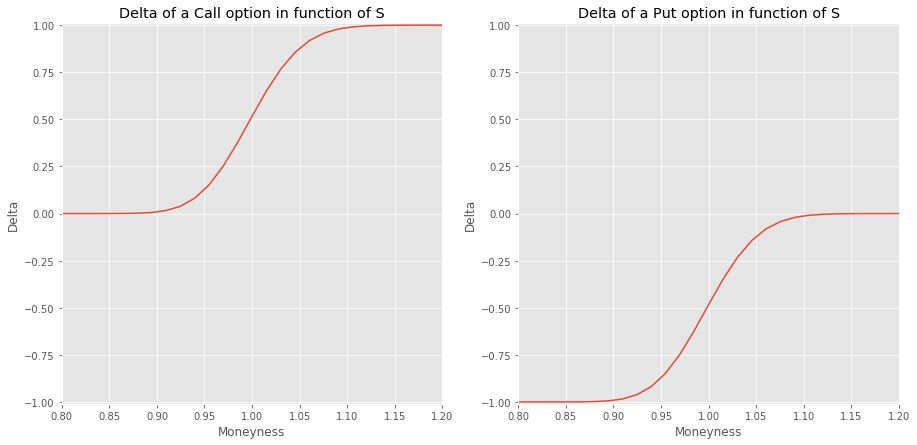

In [5]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 7] 


# Obtain list of spots and moneyness for plotting
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 100))
moneyness = [spot / K for spot in spots]


### Delta shape of a Call
option_type = 'Call'
plt.subplot(1, 2, 1)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, sd, option_type).bs_delta() for spot in spots])
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S')
plt.xlim(left=0.8, right =1.2)
plt.ylim(bottom=-1.01, top=1.01)


### Delta shape of a Put
option_type = 'Put'
plt.subplot(1, 2, 2)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, sd, option_type).bs_delta() for spot in spots])
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S')
plt.xlim(left=0.8, right =1.2)
plt.ylim(bottom=-1.01, top=1.01)


# Effects of Volatility and Time on Delta


### Effect of Volatility

When options are In-The-Money, the higher the volatility and the lower the delta. On the other hand, when options are Out-of-The-Money, the higher the volatility and the higher the delta. 
- When an option is ITM and starts behaving more and more as the underlying, a lower volatility implies a lower probability that the option falls OTM and stop moving closer to the underyling. An higher volatility implies an higher probability of the option stop seeming the underlying and therefore its delta (change in price as the price of the underlying changes) is lower, i.e. less similar to the underyling.
- The argument is the opposite when an option is OTM. The higher the volatility and the higher the probability that the option will become more similar to the underyling (higher delta) than when the volatility is lower and the option is more likely not to move as the underlying and ending up expering worthless.

To sum up the intuitive take:

|   OTM Options   |   ITM Options   |
|---|---|
|Higher volatility -> Higher delta|Higher volatility -> Lower delta|
|Lower volatility -> Lower delta|Lower volatility -> Higher delta|


### Effect of Time
When options are In-The-Money, the higher the time to maturity and the lower the delta. On the other hand, when options are Out-of-The-Money, the higher the time to maturity and the higher the delta. 
- When an option is ITM and starts behaving more and more as the underlying, a lower time to maturity implies a lower probability that the option falls OTM and stop moving closer to the underyling. An higher time to maturity implies an higher probability of the option stop seeming the underlying and therefore its delta (change in price as the price of the underlying changes) is lower, i.e. less similar to the underyling.
- The argument is the opposite when an option is OTM. The higher the time to maturity and the higher the probability that the option will become more similar to the underyling (higher delta) than when the time to maturity is lower and the option is more likely not to move as the underlying and ending up expering worthless.

To sum up the intuitive take:

|   OTM Options   |   ITM Options   |
|---|---|
|Higher time to maturity -> Higher delta|Higher time to maturity -> Lower delta|
|Lower time to maturity -> Lower delta|Lower time to maturity -> Higher delta|

(0.8, 1.2)

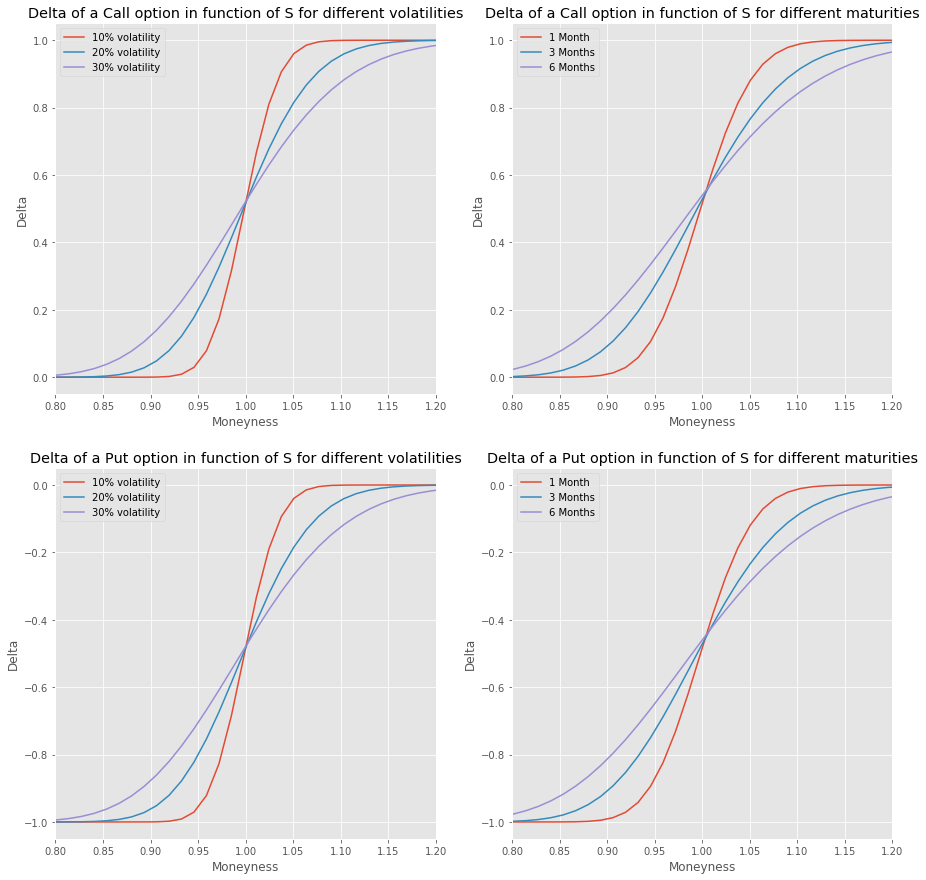

In [14]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


# Obtain list of spots and moneyness for plotting
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 100))
moneyness = [spot / K for spot in spots]


### Delta shape of a Call as time passes and volatility changes
option_type = 'Call'

plt.subplot(2, 2, 1)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.1, option_type).bs_delta() for spot in spots], label = '10% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_delta() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_delta() for spot in spots], label = '30% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.8, right =1.2)


plt.subplot(2, 2, 2)
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '1 Month')
plt.plot(moneyness, [vanilla_option(spot, K, 3/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '3 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '6 Months')
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.8, right =1.2)


### Delta shape of a Put as time passes and volatility changes
option_type = 'Put'

plt.subplot(2, 2, 3)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.1, option_type).bs_delta() for spot in spots], label = '10% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_delta() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_delta() for spot in spots], label = '30% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.8, right =1.2)


plt.subplot(2, 2, 4)
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '1 Month')
plt.plot(moneyness, [vanilla_option(spot, K, 3/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '3 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_delta() for spot in spots], label = '6 Months')
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.legend(loc = 'upper left')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.8, right =1.2)
